In [1]:
'''THis block of code pre processes the data'''
from nltk.stem import WordNetLemmatizer
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize,sent_tokenize

import csv
                                            
file_path = 'dataset/Data_mesh_csv.csv'

# Read the TSV file and convert it to a DataFrame
df = pd.read_csv(file_path, delimiter=',')



C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\sitas\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df

,pdf_name,pdf_content
0,0670.pdf,\n Introducing Data Mesh paradigm for Smart C...
1,1-s2.0-S1877050921022365-main.pdf,ScienceDirect\nAvailable online at www.science...
2,1-s2.0-S1877050923006099-main.pdf,ScienceDirect\nAvailable online at www.science...
3,2302.01713.pdf,Data Mesh: Best Practices to Avoid the Data Me...
4,2304.01062.pdf,Data Mesh: a Systematic Gray Literature Review...
5,978-1-4842-9253-2.pdf,Data Fabric and Data \nMesh Approaches with A...
6,978-3-031-12423-5_7.pdf,CoK: A Survey of Privacy Challenges\nin Relati...
7,978-3-031-36118-0.pdf,Lecture Notes on Data Engineering\nand Communi...
8,978-3-031-39847-6_1.pdf,Data Integration Revitalized: From Data\nWareh...
9,978-3-031-45021-1_23.pdf,Converging Data Mesh and Microservice\nPrincip...


In [3]:
import csv
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load stop words from NLTK library
nltk_stop_words = set(stopwords.words('english'))
print("Number of stop words from NLTK:", len(nltk_stop_words))

# Load stop words from CSV file into a DataFrame with the appropriate encoding
csv_file_path = "words.csv"
words_df = pd.read_csv(csv_file_path, header=None, names=["stopword"], encoding="ISO-8859-1")
custom_stop_words = set(map(str.lower, words_df["stopword"]))

# Combine stop words from both sources
stop_words = nltk_stop_words.union(custom_stop_words)

# Print stop words for verification
print("Number of total stop words:", len(stop_words))
print("Stop words set:", stop_words)

# Add words from CSV file to stop_words set
with open(csv_file_path, mode='r') as file:
    reader = csv.reader(file)
    # Skip header
    next(reader, None)
    # Add words to stop_words set
    for row in reader:
        word = row[0].lower().strip()
        print(f"Adding word to stop_words: {word}")
        stop_words.add(word)

# Now, stop_words set contains the words from both NLTK and the CSV file
print("Updated stop words set:", stop_words)

# Check the length of stop_words
print("Number of updated stop words:", len(stop_words))


Number of stop words from NLTK: 179
Number of total stop words: 346
Stop words set: {'aren', 'best', 'tjoa\xa0', "mightn't", 'face', "hadn't", 'further', 'review', 'interviewee', 'procedia', 'college\xa0', 'international', 'mustn', 'ed', 'khalil', 'mightn', 'result', 'elsevier', 'araújo ', 'preprints\xa0', 'itself', 'couldn', 'some', 'd', 'need', 'numerical', 'after', 'management', 'care', 'springer', 'ma', 'have', 'cited', 'during', 'not', 'will', 'don', "aren't", 'smart', 'mf', 'himself', 'di', 'or', 'hadn', "that'll", "needn't", 'tions', 'conference', 'lin', 'off', 'public', 'very', 'vol', 'once', 'what', 'onlinelibrary', 'ation', 'er', 'has', 'shan', 'being', "doesn't", 'et', 'expert', 'just', 'www', 'challenge', 'am', 'social', 'all', "shouldn't", 'his', 'o', "you've", 'chapter', "you're", 'addressed\xa0', 'license', 'before', 'wilfr\xa0', 'below', 'been', 'author', 'cc', "you'd", 'having', 'creativecommons', 'now', 'didn', 'downloaded', 'y', 'then', 'kayem', 'article', 'science',

In [4]:
words_to_check = ['http', 'com', 'author','license' ]

# Check if each word is in stop_words, and if not, add it
for word in words_to_check:
    if word not in stop_words:
        print(f"Adding '{word}' to stop_words")
        stop_words.add(word)

# Print the updated stop_words set
print("Updated stop words set:", stop_words)

Updated stop words set: {'aren', 'best', 'tjoa\xa0', "mightn't", 'face', "hadn't", 'further', 'review', 'interviewee', 'procedia', 'college\xa0', 'international', 'mustn', 'ed', 'khalil', 'mightn', 'result', 'elsevier', 'araújo ', 'preprints\xa0', 'itself', 'couldn', 'some', 'd', 'need', 'numerical', 'after', 'management', 'care', 'springer', 'coef', 'ma', 'have', 'cited', 'during', 'not', 'will', 'don', "aren't", 'smart', 'mf', 'himself', 'di', 'or', 'hadn', "that'll", "needn't", 'tions', 'conference', 'lin', 'off', 'public', 'very', 'vol', 'once', 'what', 'onlinelibrary', 'ation', 'er', 'has', 'shan', 'being', "doesn't", 'et', 'expert', 'just', 'www', 'challenge', 'am', 'social', 'all', "shouldn't", 'his', 'o', "you've", 'chapter', "you're", 'addressed\xa0', 'license', 'before', 'wilfr\xa0', 'below', 'been', 'author', 'cc', "you'd", 'having', 'creativecommons', 'now', 'didn', 'downloaded', 'addressed', 'y', 'then', 'kayem', 'college', 'article', 'science', 'your', 'enterprise', 'down

In [5]:
def clean_text(text):
    # Remove HTML tags and non-English characters
    text = re.sub(r"<[^>]+>", "", str(text))
    text = re.sub(r"[^A-Za-zÀ-ž ]", " ", str(text))

    # Tokenize and convert to lowercase
    word_tokens = word_tokenize(text)
    words_tokens_lower = [word.lower() for word in word_tokens]

    # Remove single characters and numbers
    words_filtered = [word for word in words_tokens_lower if len(word) > 1 and not word.isnumeric()]

    # Remove stop words
    words_filtered = [word for word in words_filtered if word not in stop_words]

    # Lemmatize words
    words_lemmatized = [lemmatizer.lemmatize(word) for word in words_filtered]

    # Join the words back into a string
    text_clean = " ".join(words_lemmatized)
    return text_clean


In [6]:
def drop_nan(df):
    
    df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True)
    
    return df
pdf_data = df.copy()
drop_nan(pdf_data)
pdf_data['pdf_content'] = pdf_data['pdf_content'].apply(clean_text)


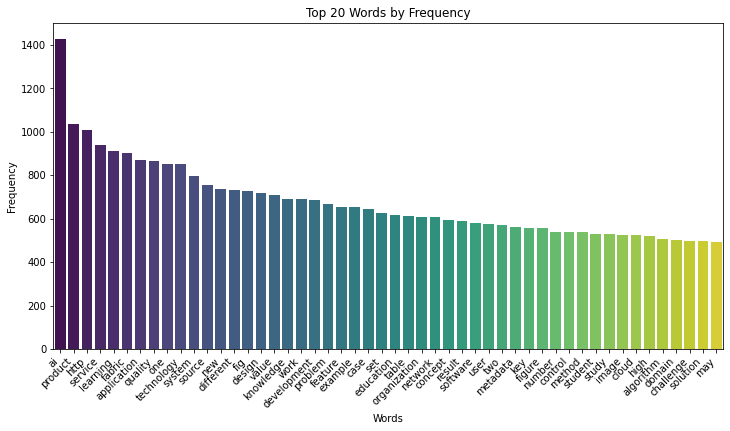

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'pdf_content' column contains the cleaned text
text_combined = ' '.join(pdf_data['pdf_content'])

# Tokenize the text
tokens = word_tokenize(text_combined)

# Count the frequency of each word
word_freq = nltk.FreqDist(tokens)

# Create a DataFrame from the frequency distribution
word_freq_df = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N words by frequency in a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(50), palette='viridis')
plt.title('Top 20 Words by Frequency')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
pdf_data

,pdf_name,pdf_content
0,0670.pdf,introducing city platform design marcin kryste...
1,1-s2.0-S1877050921022365-main.pdf,author http license system projman system tech...
2,1-s2.0-S1877050923006099-main.pdf,author http license program chair procs procs ...
3,2302.01713.pdf,practice avoid mess jan bode germany niklas kü...
4,2304.01062.pdf,systematic gray abel goedegebuure indika kumar...
5,978-1-4842-9253-2.pdf,fabric approach ai guide ai cataloging integra...
6,978-3-031-12423-5_7.pdf,cok survey privacy challenge relation mesh nik...
7,978-3-031-36118-0.pdf,lecture note engineering communication technol...
8,978-3-031-39847-6_1.pdf,integration revitalized warehouse lake robert ...
9,978-3-031-45021-1_23.pdf,converging microservice principle uni logical ...


In [9]:
csv_filename = 'Data_mesh_cleaned.csv'

# Save the DataFrame to a CSV file
pdf_data.to_csv(csv_filename, index=False)

In [10]:
word_freq_df.head(20)

,Word,Frequency
615,ai,1429
641,product,1037
195,http,1009
34,service,942
900,learning,911
2179,fabric,902
35,application,870
63,quality,865
606,one,853
21,technology,852
